In [2]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [3]:
# Load the SVHN dataset
(ds_train, ds_test), ds_info = tfds.load(
    'svhn_cropped',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [4]:
# Function to preprocess the data
def preprocess(image, label):
    # Normalize the image to [0, 1] range
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [5]:
# Apply preprocessing to the datasets
batch_size = 64
ds_train = ds_train.map(preprocess).shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [6]:
# Define a CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    return model

In [7]:
# Create the model
model = create_model()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test
)

Epoch 1/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 136s 114ms/step - accuracy: 0.3373 - loss: 1.8786 - val_accuracy: 0.8311 - val_loss: 0.5775
Epoch 2/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 135s 116ms/step - accuracy: 0.7826 - loss: 0.7201 - val_accuracy: 0.8717 - val_loss: 0.4370
Epoch 3/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 130s 113ms/step - accuracy: 0.8258 - loss: 0.5715 - val_accuracy: 0.8864 - val_loss: 0.3883
Epoch 4/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 136s 107ms/step - accuracy: 0.8403 - loss: 0.5192 - val_accuracy: 0.8969 - val_loss: 0.3644
Epoch 5/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 133s 115ms/step - accuracy: 0.8557 - loss: 0.4834 - val_accuracy: 0.9008 - val_loss: 0.3478


In [9]:

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

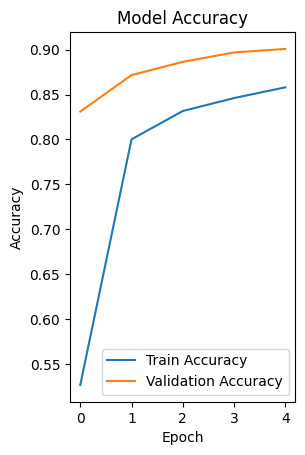

In [10]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

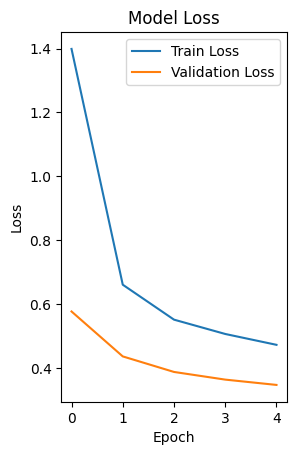

In [15]:
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

407/407 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9023 - loss: 0.3397
Test Accuracy: 90.08%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


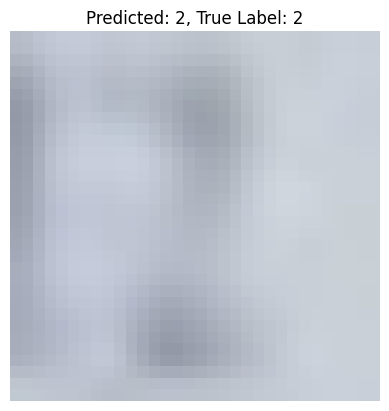

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


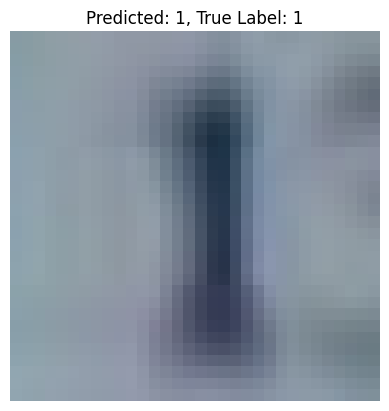

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


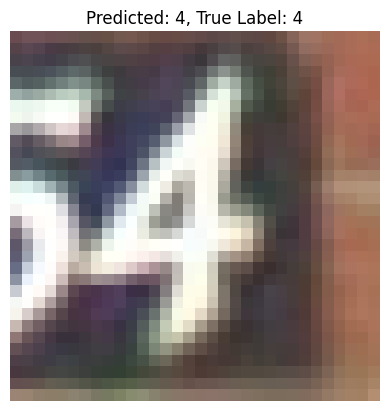

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


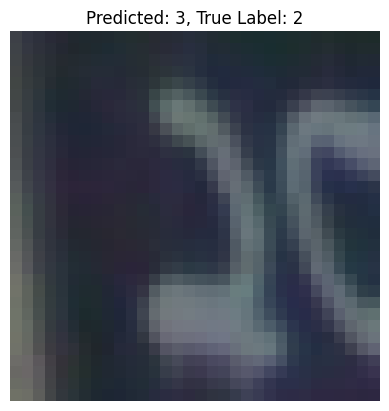

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


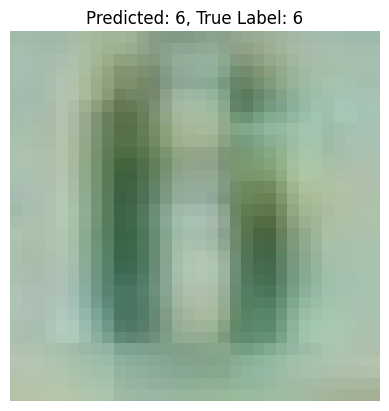

In [14]:
# Make predictions on a few test samples
for image, label in ds_test.take(5):
    pred = model.predict(tf.expand_dims(image[0], axis=0))
    plt.imshow(image[0].numpy())
    plt.title(f"Predicted: {tf.argmax(pred[0]).numpy()}, True Label: {label[0].numpy()}")
    plt.axis('off')
    plt.show()
